# Сборный проект для интернет-магазина

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Откроем файл с данными и изучим общую информацию. 

**1.1 Импортируем необходимые библиотеки, прочитаем данные из csv-файла в датафрейм и сохраним в переменную data.**

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
!pip install missingno

import missingno as msno

In [3]:
data = pd.read_csv('/datasets/games.csv')

**1.2 Выведем основную информацию о датафрейме и проверим количество явных дубликатов.**

In [4]:
data.info()
print('Количество явных дубликатов =', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Количество явных дубликатов = 0


**1.3 Выведем первые 20 строчек датафрейма на экран.**

In [5]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**1.4 Посмотрим информацию о таблице методом describe().**

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:**
- всего в таблице 11 столбцов и 16715 записей;
- названия столбцов необходимо привести к нижнему регистру;
- столбцы: 'Critic_Score', 'User_Score' и 'Rating' имеют наибольшее количество пропусков;
- в столбцах: 'Year_of_Release','Critic_Score','User_Score' - не подходящий тип данных;
- явные дубликаты не выявлены.


### Предобработка данных

In [7]:
# приведем все названия к нижнему регистру
data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# Определим в каких столбцах есть пропуски.
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<AxesSubplot:>

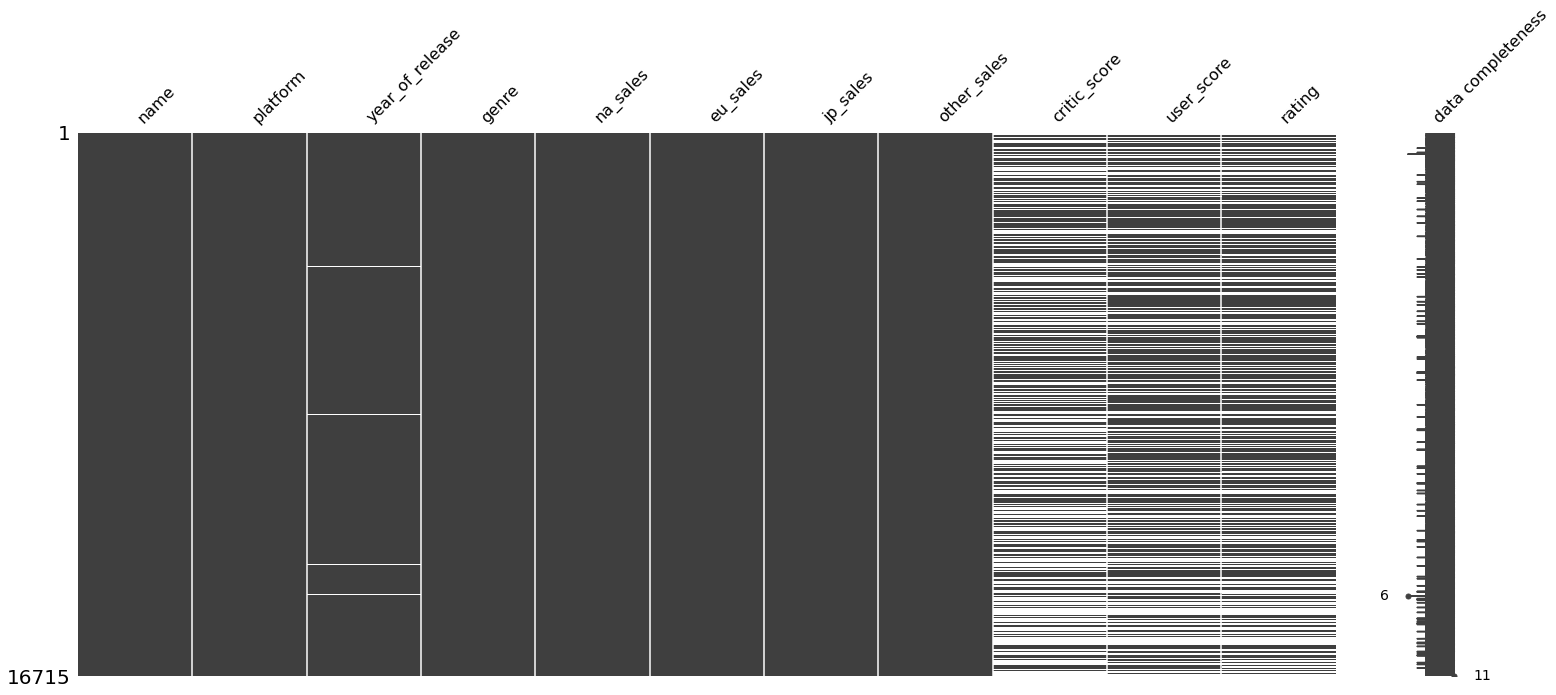

In [9]:
msno.matrix(data, labels=True)

<AxesSubplot:>

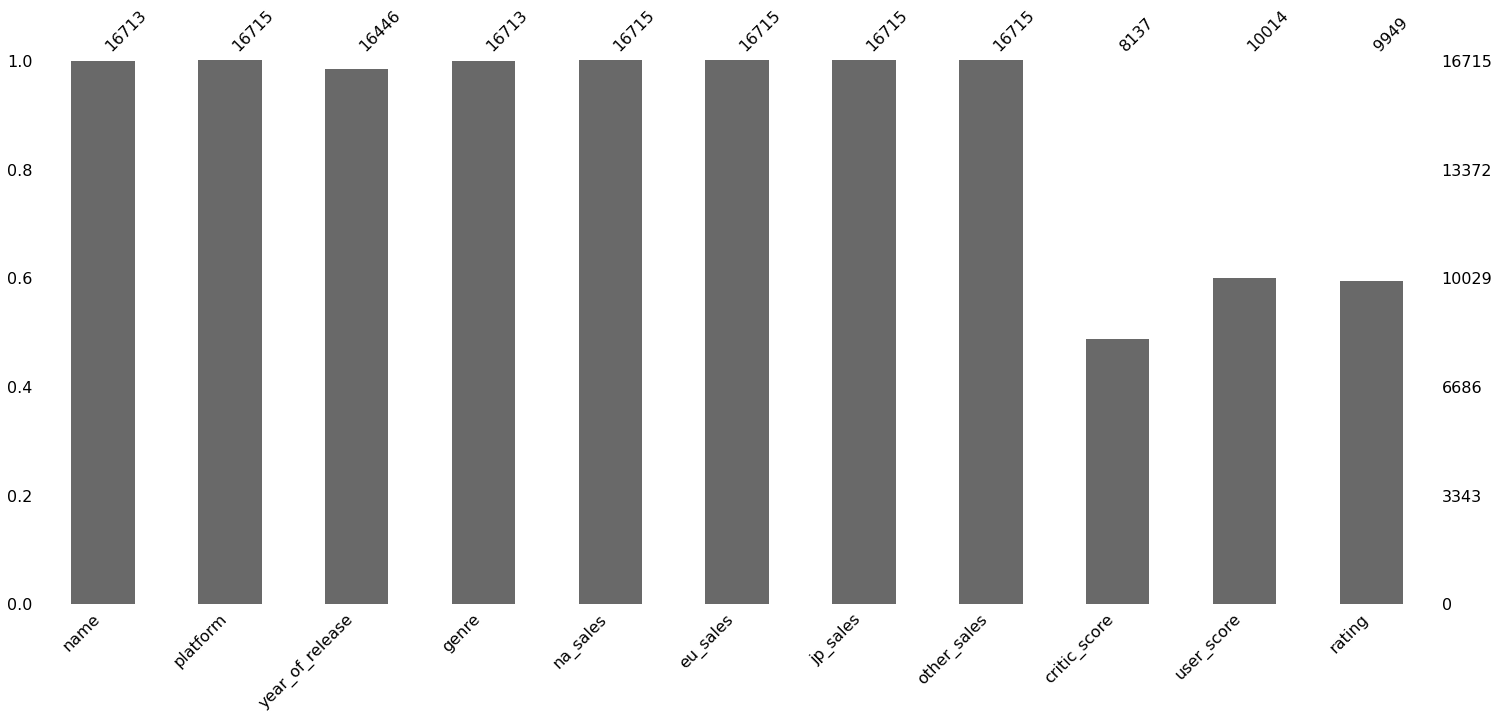

In [10]:
msno.bar(data)

<AxesSubplot:>

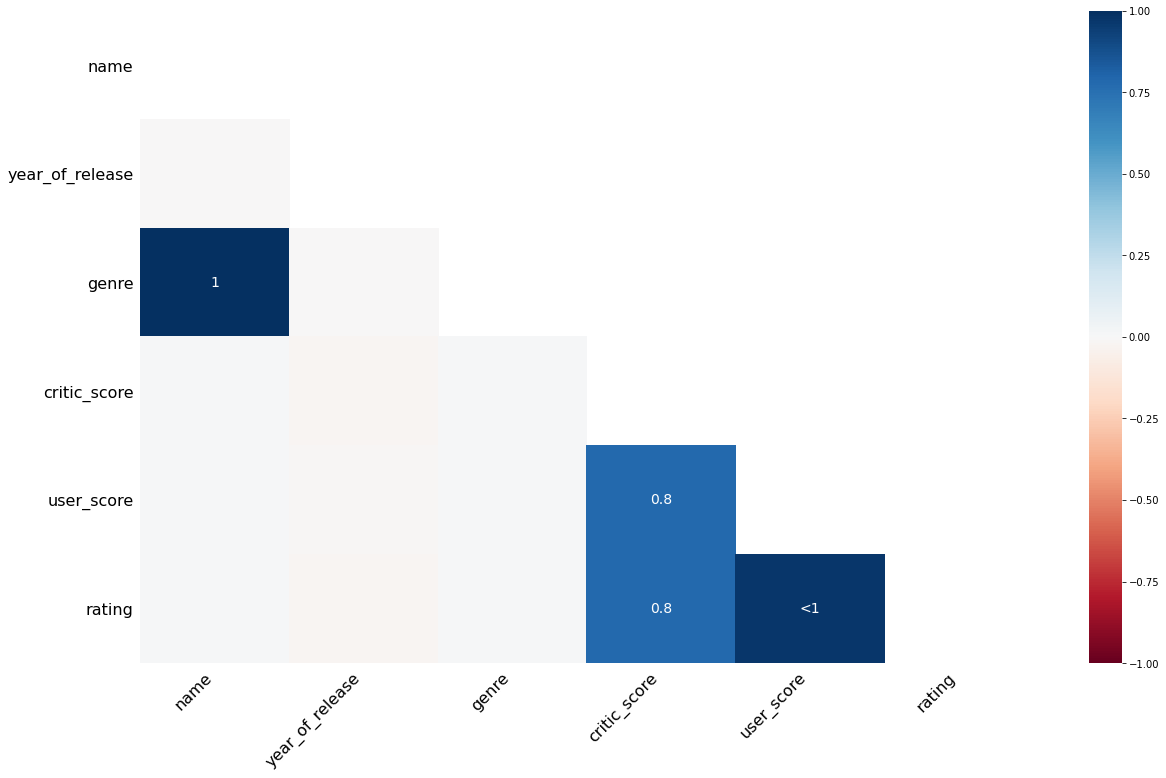

In [11]:
msno.heatmap(data)

In [12]:
#столбец 'name'
data[data.name.isna()]

# в строках нет достаточных данных - удалим
data.dropna(subset=['name'], inplace=True)
print('Количество пропусков в столбце "name" =', data['name'].isna().sum())


Количество пропусков в столбце "name" = 0


In [13]:
# столбец 'year_of_release'
data['year_of_release'].isna().sum()

# удалим пропуски, т.к. их мало (менее 2х %)
data.dropna(subset=['year_of_release'], inplace=True)
print('Количество пропусков в столбце "year_of_release" =', data['year_of_release'].isna().sum())


Количество пропусков в столбце "year_of_release" = 0


In [14]:
# Аббревиатура 'tbd' - используется, если какая-то информация еще не определена или решение по вопросу не принято. 
# Поэтому для столбца 'user_score' заменим 'tbd' на NaN.
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan 

In [15]:
# преобразуем тип данных в 'year_of_release'
data['year_of_release'] = data['year_of_release'].astype('Int32')

# преобразуем тип данных в 'critic_score'
data['critic_score'] = data['critic_score'].astype('Int32')

# преобразуем тип данных в 'user_score'
data['user_score'] = data['user_score'].astype(float)

for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    data[col] = data[col].astype('Float32')

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  Float32
 5   eu_sales         16444 non-null  Float32
 6   jp_sales         16444 non-null  Float32
 7   other_sales      16444 non-null  Float32
 8   critic_score     7983 non-null   Int32  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Float32(4), Int32(2), float64(1), object(4)
memory usage: 1.2+ MB


In [16]:
# посчитаем суммарные продажи по всем регионам
data['total_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']).astype('float32')
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,<NA>,NaN,NaN,31.380001
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,<NA>,NaN,NaN,30.260000
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.5,2.88,89,8.5,E,29.799999
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.910000
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.7,2.24,87,8.4,E,28.319998
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.309999


**Вывод:**
- привели названия столбцов к нижнему регистру;
- преобразовали тип данных; 
- удалили пропуски там, где это было возможно;
- обратили внимание на аббревиатуру 'tbd' и произвели обработку;
- по столбцам - 'critic_score', 'user_score' и 'rating' - осталось много пропусков, но мы не можем их восстановить или удалить, т.к. это повлияет на результат исследования. Поэтому оставили всё как есть
- посчитали суммарные продажи

### Проведем исследовательский анализ данных

**3.1 Посмотрим сколько игр выпускалось в разные годы.**

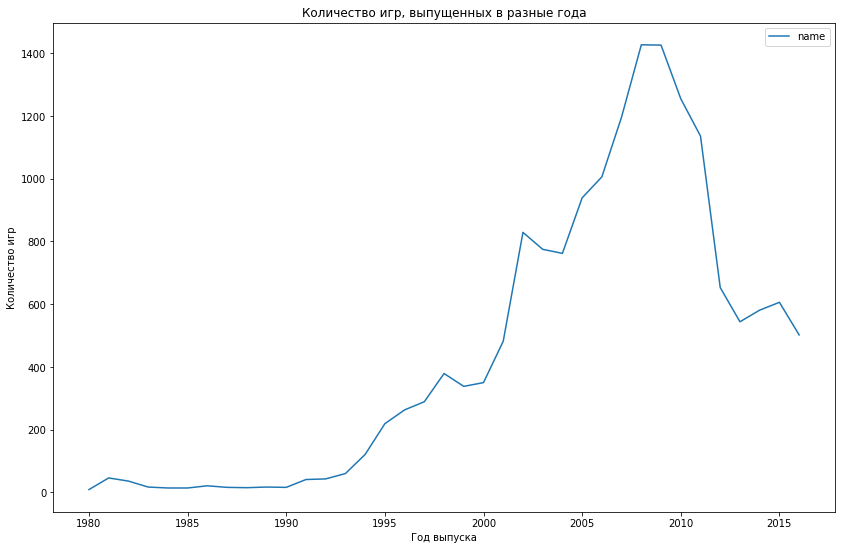

In [17]:
games_different_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(14,9))
sns.lineplot(data=games_different_years).set(title='Количество игр, выпущенных в разные года', xlabel='Год выпуска', ylabel='Количество игр')
sns.set_style({'axes.grid' : True})
plt.show()


- начиная с 1994-1995 начался активный выпуск игр;
- пик выпусков приходится на 2008-2009 года;
- начиная с 2010 года начался резкий спад выпуска игр, что может быть связано с активным использованием мобильных телефонов и соответственно игр для них.

**3.2 Посмотрим как менялись продажи по платформам.**

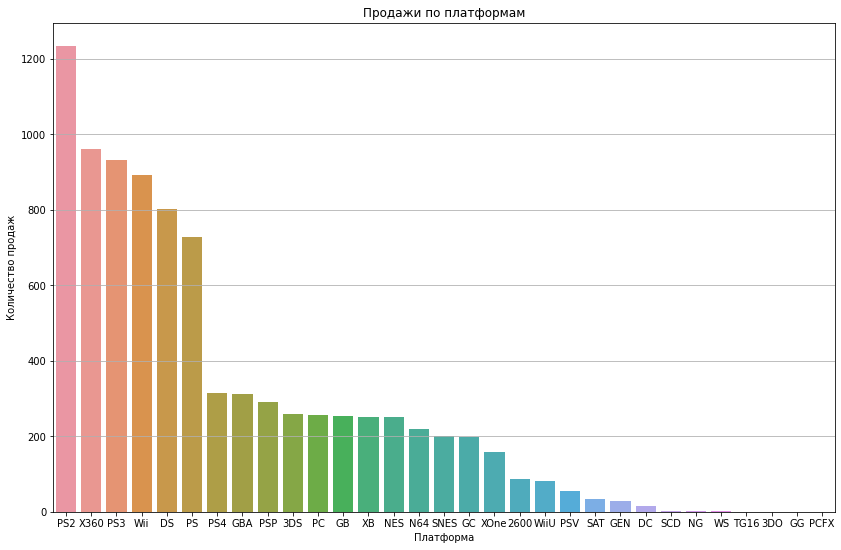

In [18]:
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(14,9))
(sns.barplot(data=sales_by_platform, x=sales_by_platform.index, y='total_sales')
    .set(title='Продажи по платформам', xlabel='Платформа', ylabel='Количество продаж'))
sns.set_style({'axes.grid' : True})
plt.show()

Наибольшие суммарные продажи на платформах: 
PS2, X360, PS3, Wii и PS.
Построим для них распределение по годам.

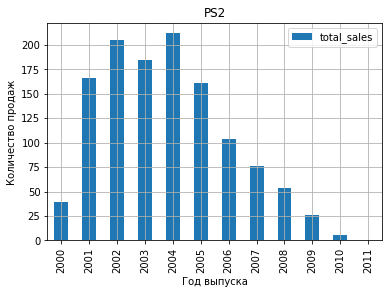

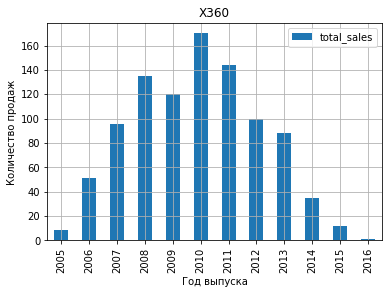

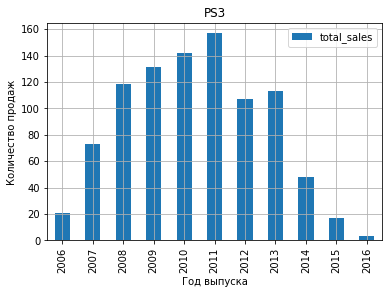

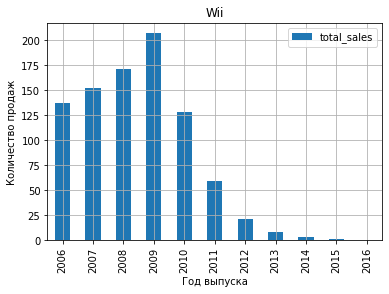

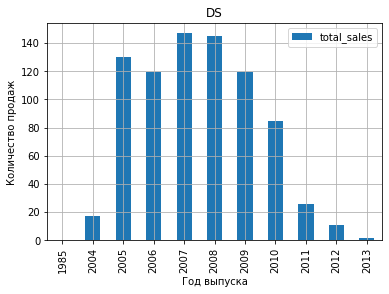

In [19]:
sales_by_platform_sorted = sales_by_platform.sort_values(by='total_sales', ascending=False).head(5)
for platform in sales_by_platform_sorted.index:
    (data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .plot(kind='bar', title=platform, xlabel='Год выпуска', ylabel='Количество продаж'))
    

- после появления платформы, она за 3-4 года выходит в топ;
- и также за 3-4 года продажи станоятся минимальными;
- одну платформу (например PS2) сменяет новая модель (например PS3).



**3.3 Определим актуальный период.**

Нам необходимо взять данные, которые помогут построить прогноз на 2017 год. Т.к. в 2016 году игры уже практически не выпускались, то мы не можем взять данные за предыдущий год, но мы можем взять данные за последние 2-3 года. Будем считать актуальным - период за 2014-2016 года.

In [20]:
current_period = data.query('year_of_release >= 2014')
current_period.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.630000
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.1,0.74,<NA>,NaN,NaN,11.680000
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.980000
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.660000
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.600000
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,<NA>,NaN,NaN,7.550000
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,NaN,7.390000
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.170000


**3.4 Определим какие платформы лидируют по продажам, растут или падают.**

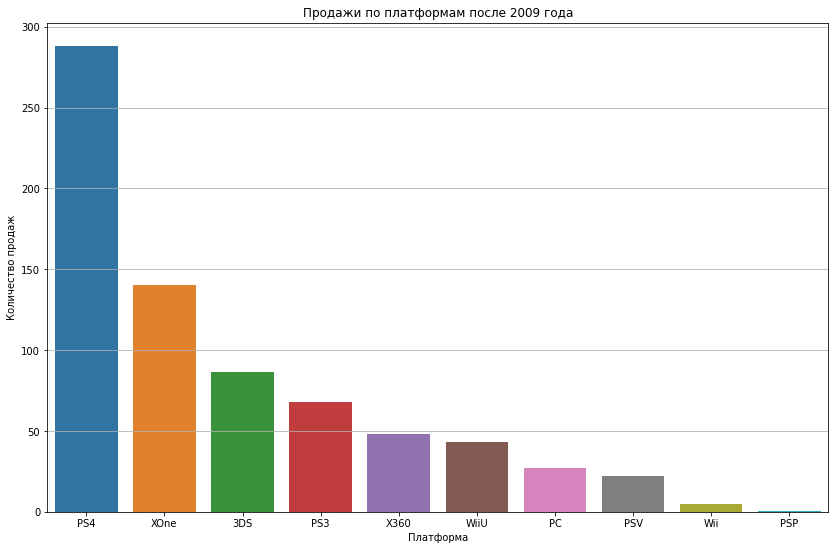

In [21]:
sales_by_platform_cp = current_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(14,9))
(sns.barplot(data=sales_by_platform_cp, x=sales_by_platform_cp.index, y='total_sales')
    .set(title='Продажи по платформам после 2009 года', xlabel='Платформа', ylabel='Количество продаж'))
sns.set_style({'axes.grid' : True})
plt.show()

In [22]:
# выберем несколько потенциально прибыльных платформ
profitable_platform = current_period.query('platform in ["PS4", "XOne", "3DS", "PS3", "WiiU", "X360"]')
profitable_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.630000
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.620001
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.1,0.74,<NA>,NaN,NaN,11.680000
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.580000
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.980000
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.660000
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.600000
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,<NA>,NaN,NaN,7.550000
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,NaN,7.390000
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.170000


Playstation сохраняет первое место в рейтинге продаж и в срезе 2014-2016 годов, и в продажах по всем годам, только на смену старой модели - приходит новая, так на смену PS2 пришла PS3, а затем PS4.
А XOne сменил X360.

**3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

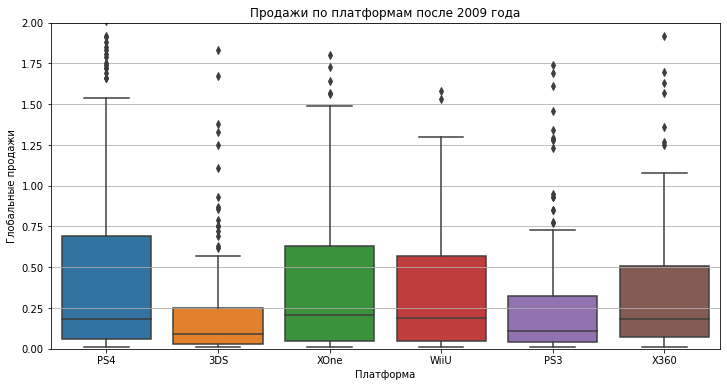

In [23]:
plt.figure(figsize=(12,6))
(sns.boxplot(data=profitable_platform, x='platform', y='total_sales')
    .set(title='Продажи по платформам после 2009 года', xlabel='Платформа', ylabel='Глобальные продажи', ylim=(0, 2)))
plt.show()

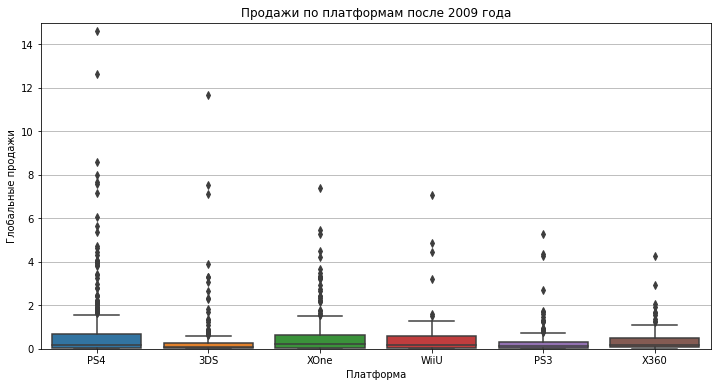

In [24]:
plt.figure(figsize=(12,6))
(sns.boxplot(data=profitable_platform, x='platform', y='total_sales')
    .set(title='Продажи по платформам после 2009 года', xlabel='Платформа', ylabel='Глобальные продажи', ylim=(0, 15)))
plt.show()

На графике мы видим, что медиана находится примерно на одинаковом уровне (за исключением 3DS, возможно, потому что это портативная платформа и стоимость игр гораздо ниже и PS3, потому что ей на смену приходит PS4) и разница в продажах между платформами небольшая.

**3.6 Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


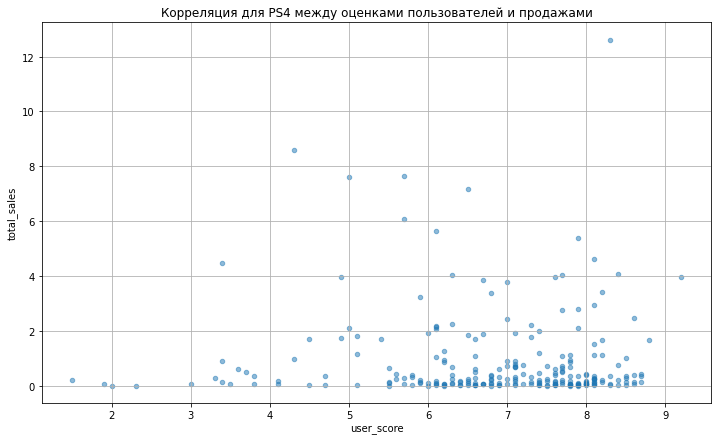

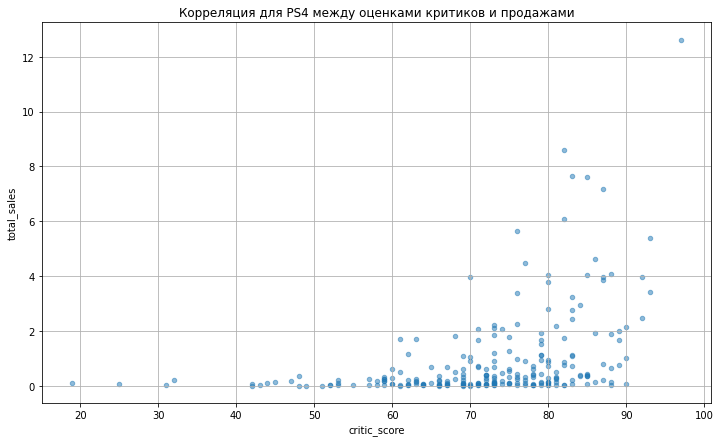

In [25]:
# построим диаграмму рассеяния и посчитаем корреляцию для PS4
playstation4 = profitable_platform.query('platform == "PS4"')
playstation4.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для PS4 между оценками пользователей и продажами')
playstation4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для PS4 между оценками критиков и продажами')
playstation4[['critic_score','user_score', 'total_sales']].corr()

- Коэффициент Пирсона между отзывами пользователей и продажами = -0.040132.
- Коэффициент Пирсона между отзывами критиков и продажами = 0.402661.

Можно сделать вывод, что отзывы пользователей не влияют на количество продаж, т.к. корреляция почти нулевая. 
Отзывы критиков имеют влияние на количество продаж, но не сильное, т.к. корреляция умеренная.


**3.6 Посмотрим влияние отзывов на продажи внутри других платформ.**

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.428677
user_score,0.440977,1.000000,-0.070384
total_sales,0.428677,-0.070384,1.000000


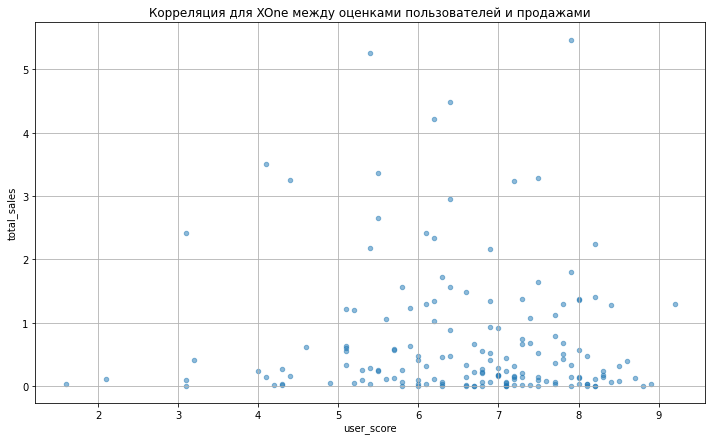

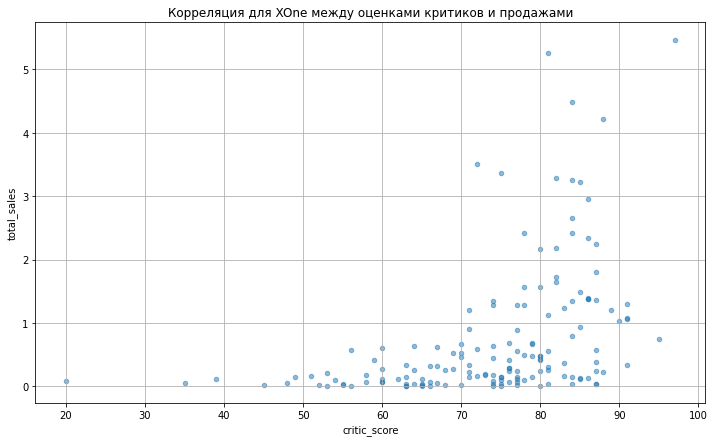

In [26]:
# построим диаграмму рассеяния и посчитаем корреляцию для XOne
XOne = profitable_platform.query('platform == "XOne"')
XOne.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для XOne между оценками пользователей и продажами')
XOne.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для XOne между оценками критиков и продажами')
XOne[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.862485,0.314118
user_score,0.862485,1.000000,0.215193
total_sales,0.314118,0.215193,1.000000


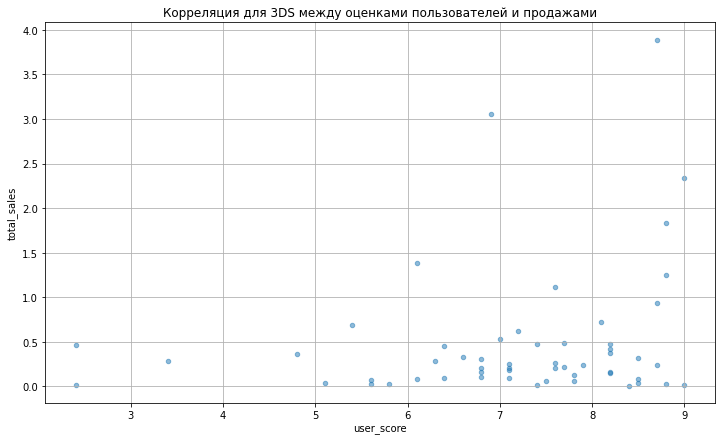

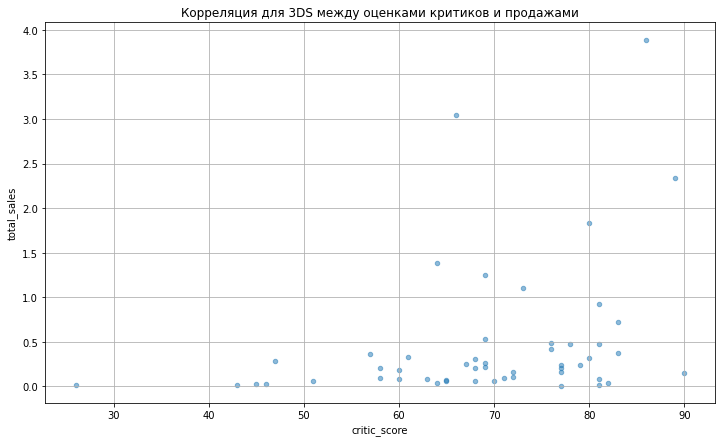

In [27]:
# построим диаграмму рассеяния и посчитаем корреляцию для 3DS
nintendo_3ds = profitable_platform.query('platform == "3DS"')
nintendo_3ds.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для 3DS между оценками пользователей и продажами')
nintendo_3ds.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для 3DS между оценками критиков и продажами')
nintendo_3ds[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.693445,0.446575
user_score,0.693445,1.000000,-0.166761
total_sales,0.446575,-0.166761,1.000000


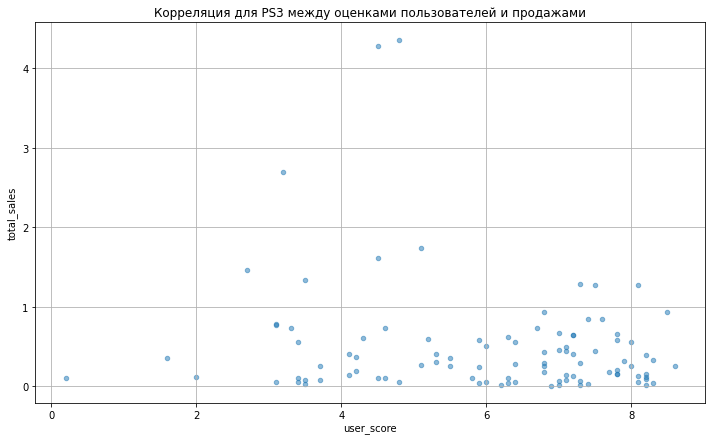

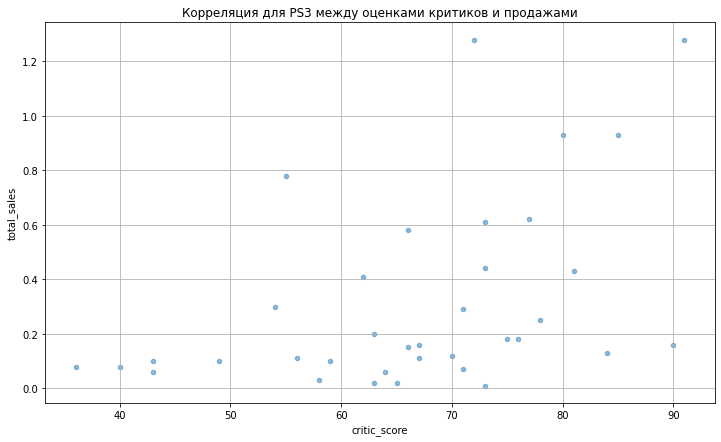

In [28]:
# построим диаграмму рассеяния и посчитаем корреляцию для PS3
playstation3 = profitable_platform.query('platform == "PS3"')
playstation3.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для PS3 между оценками пользователей и продажами')
playstation3.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для PS3 между оценками критиков и продажами')
playstation3[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.625309,0.525723
user_score,0.625309,1.000000,-0.138445
total_sales,0.525723,-0.138445,1.000000


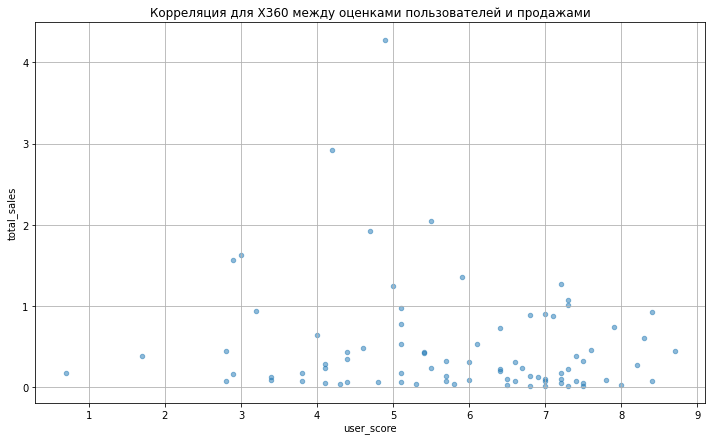

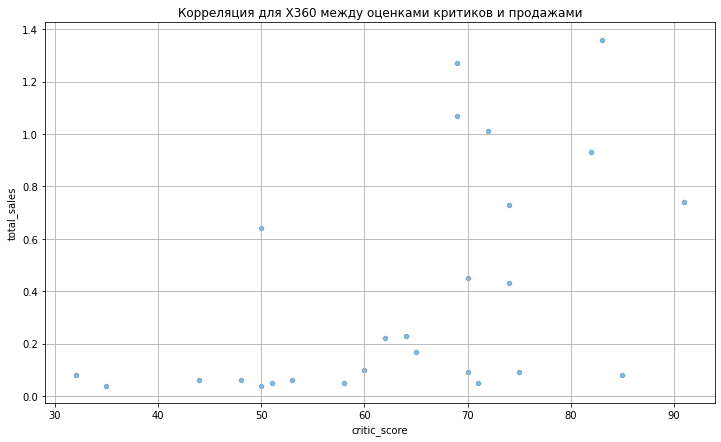

In [29]:
# построим диаграмму рассеяния и посчитаем корреляцию для X360
xbox_360 = profitable_platform.query('platform == "X360"')
xbox_360.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для X360 между оценками пользователей и продажами')
xbox_360.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для X360 между оценками критиков и продажами')
xbox_360[['critic_score','user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.763536,0.370201
user_score,0.763536,1.000000,0.407926
total_sales,0.370201,0.407926,1.000000


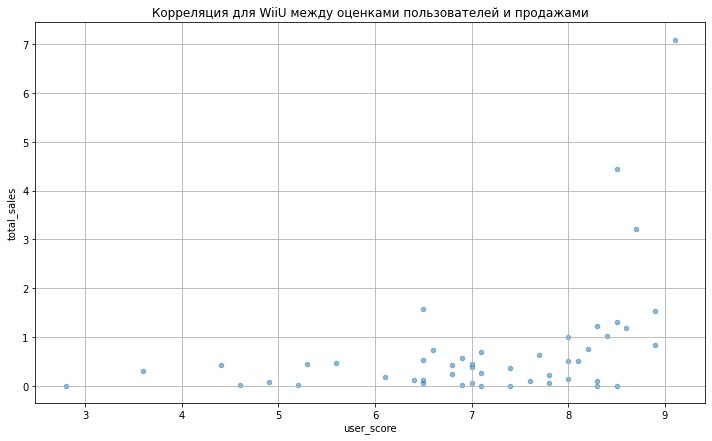

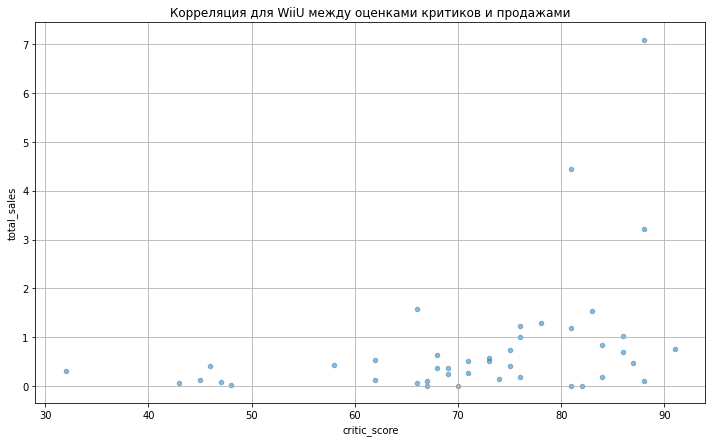

In [30]:
# построим диаграмму рассеяния и посчитаем корреляцию для WiiU
nintendo_wiiu = profitable_platform.query('platform == "WiiU"')
nintendo_wiiu.plot(x='user_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для WiiU между оценками пользователей и продажами')
nintendo_wiiu.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=0.5, figsize=(12, 7), title='Корреляция для WiiU между оценками критиков и продажами')
nintendo_wiiu[['critic_score','user_score', 'total_sales']].corr()

**XOne:**
- Коэффициент Пирсона между отзывами пользователей и продажами = -0.070384.
- Коэффициент Пирсона между отзывами критиков и продажами = 0.428677.

**3DS:**
- Коэффициент Пирсона между отзывами пользователей и продажами = 0.215193.
- Коэффициент Пирсона между отзывами критиков и продажами = 0.314118.

**PS3:**
- Коэффициент Пирсона между отзывами пользователей и продажами = -0.166761.
- Коэффициент Пирсона между отзывами критиков и продажами = 0.446575.

**X360:**
- Коэффициент Пирсона между отзывами пользователей и продажами = -0.138445.
- Коэффициент Пирсона между отзывами критиков и продажами = 0.525723.

**WiiU:**
- Коэффициент Пирсона между отзывами пользователей и продажами = 0.370201.
- Коэффициент Пирсона между отзывами критиков и продажами = 0.407926.

Влияние отзывов критиков на продажи примерно одинаковое (от 30% до 50%) для всех платформ. 

Влияния отзвов пользователей есть только для портативных приставок Nintendo 3DS и Nintendo WiiU (22% и 37%) .

**3.7 Посмотрим на общее распределение игр по жанрам.**

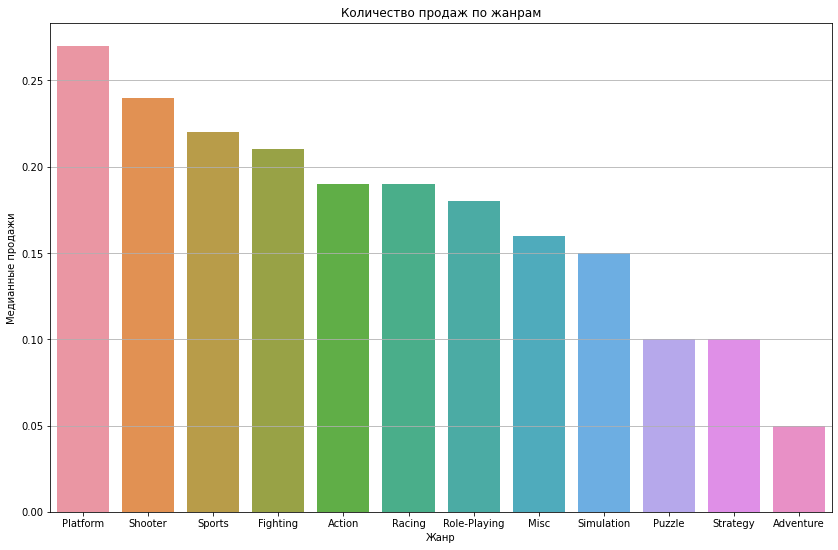

In [31]:
games_genre = data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(14,9))
(sns.barplot(data=games_genre, x=games_genre.index, y='total_sales')
    .set(title='Количество продаж по жанрам', xlabel='Жанр', ylabel='Медианные продажи'))
sns.set_style({'axes.grid' : True})
plt.show()

Если взять медианные продажи:
- Самые популярные и прибыльные жанры: Platform, Shooter и Sports.
- Наименее популярные и прибыльные жанры: Puzzle, Strategy и Adventure.

**Вывод:**
- начиная с 1994-1995 начался активный выпуск игр;
- пик выпусков приходится на 2008-2009 года;
- начиная с 2010 года начался резкий спад выпуска игр, что может быть связано с активным использованием мобильных телефонов и соответственно выпуска игр для них, а может и из-за большого количества "прошитых" приставок, на которые игры писались дома на болванку;
- наибольшие суммарные продажи на платформах: PS2, X360, PS3, Wii и PS.
- после появления платформы, она за 3-4 года выходит в топ и также за 3-4 года продажи станоятся минимальными;
- Playstation сохраняет первое место в рейтинге продаж и в срезе 2014-2016 годов, и в продажах по всем годам, только на смену старой модели - приходит новая, так на смену PS2 пришла PS3, а затем PS4. А XOne сменил X360.
- отзывы пользователей не влияют на количество продаж, т.к. корреляция почти нулевая. 
- отзывы критиков имеют влияние на количество продаж, но не сильное, т.к. корреляция умеренная.
-	Самые популярные и прибыльные жанры: Platform, Shooter и Sports.
-	Наименее популярные и прибыльные жанры: Puzzle, Strategy и Adventure.


### Составим портрет пользователя каждого региона

**4.1 Определим самые популярные платформы для каждого региона (NA, EU, JP).**

  platform   na_sales
0      PS4  98.610001
1     XOne  81.269997
2     X360  28.299999
3      3DS  22.639999
4      PS3  22.049999


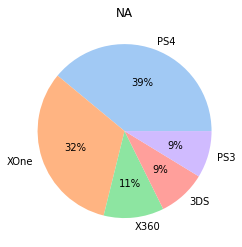

In [32]:
# построим круговую диаграмму для NA
na = current_period.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).reset_index()
print(na)
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')
plt.pie(x=na['na_sales'], labels=na['platform'], colors = colors, autopct='%.0f%%')
ax.set_title("NA")
plt.show()

  platform    eu_sales
0      PS4  130.039993
1     XOne       46.25
2      PS3   25.539999
3       PC   17.969999
4      3DS   16.120001


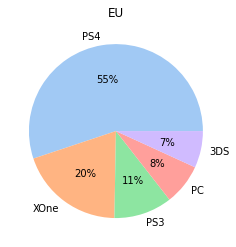

In [33]:
# построим круговую диаграмму для EU
eu = current_period.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).reset_index()
print(eu)
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')
plt.pie(x=eu['eu_sales'], labels=eu['platform'], colors = colors, autopct='%.0f%%')
ax.set_title("EU")
plt.show()

  platform   jp_sales
0      3DS  44.240002
1      PS4      15.02
2      PSV      14.54
3      PS3      11.22
4     WiiU       7.31


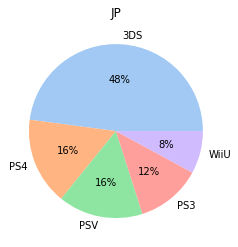

In [34]:
# построим круговую диаграмму для JP
jp = current_period.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).reset_index()
print(jp)
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')
plt.pie(x=jp['jp_sales'], labels=jp['platform'], colors = colors, autopct='%.0f%%')
ax.set_title("JP")
plt.show()

- в Америке лидирует по количеству продаж - PS4, доля продаж = 39%, второе место, 32% - XOne;
- в Европе лидирует по количеству продаж - PS4, доля продаж = 55%, второе место - 20% - XOne;
- в Японии лидирует по количеству продаж - 3DS, доля продаж = 48%, второе место поделили PS4 и PSV - 16%;

Доли продаж во всех регионах распределены примерно одинаково, только сами платформы - разные.

**4.2 Определим самые популярные жанры для каждого региона (NA, EU, JP).**

          genre   na_sales
0       Shooter  79.019997
1        Action  72.529999
2        Sports  46.130001
3  Role-Playing  33.470001
4          Misc      15.05


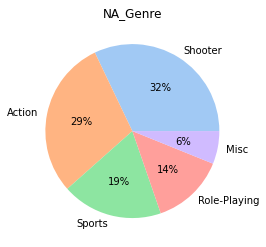

In [35]:
# построим круговую диаграмму для NA
na_genre = current_period.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).reset_index()
print(na_genre)
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')
plt.pie(x=na_genre['na_sales'], labels=na_genre['genre'], colors = colors, autopct='%.0f%%')
ax.set_title("NA_Genre")
plt.show()

          genre   eu_sales
0        Action      74.68
1       Shooter  65.519997
2        Sports      45.73
3  Role-Playing      28.17
4        Racing      14.13


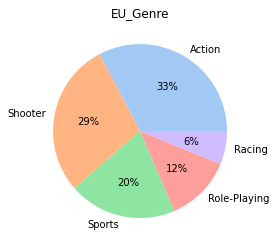

In [36]:
# построим круговую диаграмму для EU
eu_genre = current_period.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).reset_index()
print(eu_genre)
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')
plt.pie(x=eu_genre['eu_sales'], labels=eu_genre['genre'], colors = colors, autopct='%.0f%%')
ax.set_title("EU_Genre")
plt.show()

          genre  jp_sales
0  Role-Playing     31.16
1        Action     29.58
2      Fighting      6.37
3          Misc      5.61
4       Shooter      4.87


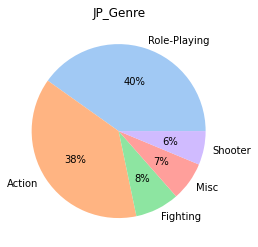

In [37]:
# построим круговую диаграмму для JP
jp_genre = current_period.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).reset_index()
print(jp_genre)
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')
plt.pie(x=jp_genre['jp_sales'], labels=jp_genre['genre'], colors = colors, autopct='%.0f%%')
ax.set_title("JP_Genre")
plt.show()

- в Америке и Европе самые популярные жанры - Action (32% и 29%) и - Shooter (29% и 32%), третье место - Sports (20%);
- в Японии долю 40% занимает Role-Playing, на втором месте Action, а жанр Sports - даже не попал в топ-5.

Можно сделать вывод, что в Америке и Европе у пользователей похожие вкусы по жанрам и платформам.
В Японии же предпочитают портативные приставки и жанр Role-Playing из-за его популярности в стране.

**4.3 Влияние рейтинга ESRB на продажи в отдельном регионе.**

  rating   na_sales
0      M  96.419998
1      E  50.740002
2      T  38.950001
3   E10+      33.23


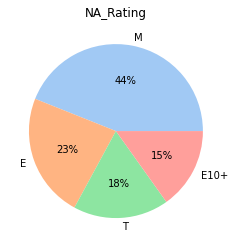

In [38]:
# построим круговую диаграмму для NA
na_rating = current_period.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).reset_index()
print(na_rating)
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')
plt.pie(x=na_rating['na_sales'], labels=na_rating['rating'], colors = colors, autopct='%.0f%%')
ax.set_title("NA_Rating")
plt.show()

  rating   eu_sales
0      M  93.440002
1      E  58.060001
2      T      34.07
3   E10+      26.16


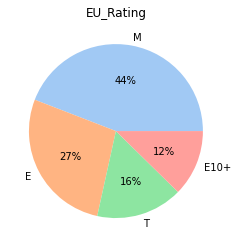

In [39]:
# построим круговую диаграмму для EU
eu_rating = current_period.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).reset_index()
print(eu_rating)
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')
plt.pie(x=eu_rating['eu_sales'], labels=eu_rating['rating'], colors = colors, autopct='%.0f%%')
ax.set_title("EU_Rating")
plt.show()

  rating  jp_sales
0      T     14.78
1      E      8.94
2      M      8.01
3   E10+      4.46


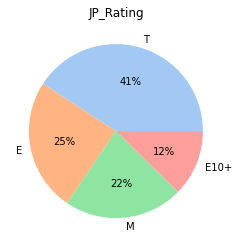

In [40]:
# построим круговую диаграмму для JP
jp_rating = current_period.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).reset_index()
print(jp_rating)
fig, ax = plt.subplots()
colors = sns.color_palette('pastel')
plt.pie(x=jp_rating['jp_sales'], labels=jp_rating['rating'], colors = colors, autopct='%.0f%%')
ax.set_title("JP_Rating")
plt.show()

- в Америке и Европе лидируют игры "Для взрослых", 17+ (44%), второе место занимают игры "Для всех" (23% и 27%), на третьем месте игры "Для подростков" (16% и 18%);
- в Японии 41% занимают игры "Для подростков", 25% игры "Для всех" и 22% занимают игры "Для взрослых"
- распределение по долям примерно одинаковое,  рейтинг ESRB не сильно влияет на продажи




**Портрет пользователя для каждого региона:**

Портрет Американца:
- играет на PS4 в игры жанра 'Action' и 'Shooter' с рейтингом "Для взрослых"

Портрет Европейца:
- играет на PS4 в игры жанра 'Action' и 'Shooter' с рейтингом "Для взрослых"

Портрет Японца:
- играет на Nintendo 3DS в игры жанра 'Role-Playing' с рейтингом "Для подростков"



### Проверка гипотез

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Нулевая гипотеза (Н0):
-	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза (Н1):
-	Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [41]:
# сохраним данные по платформе XOne 
xone = current_period[(current_period['platform'] == 'XOne') & (current_period['user_score'].isna() == False)]['user_score']

# сохраним данные по платформе PC
pc = current_period[(current_period['platform'] == 'PC') & (current_period['user_score'].isna() == False)]['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей
# по взятым из них выборкам
results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть гипотезу')


p-значение: 0.10450507919348415
Не получилось опровергнуть гипотезу


Не получилось опровергнуть нулевую гипотезу Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Нулевая гипотеза (Н0):
-	Средние пользовательские рейтинги жанров Action и Sports одинаковые;

Альтернативная гипотеза (Н1):
-	Средние пользовательские рейтинги жанров Action и Sports разные.

In [42]:
# сохраним данные по платформе XOne 
action = current_period[(current_period['genre'] == 'Action') & (current_period['user_score'].isna() == False)]['user_score']

# сохраним данные по платформе PC
sports = current_period[(current_period['genre'] == 'Sports') & (current_period['user_score'].isna() == False)]['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

# используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей
# по взятым из них выборкам
results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Отвергвем нулевую гипотезу Н0 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Общий вывод

**Изучена общая информация по таблице:**
-	всего в таблице 11 столбцов и 16715 записей;
-	названия столбцов необходимо привести к нижнему регистру;
-	столбцы: 'Critic_Score', 'User_Score' и 'Rating' имеют наибольшее количество пропусков;
-	в столбцах: 'Year_of_Release','Critic_Score','User_Score' - не подходящий тип данных;
-	явные дубликаты не выявлены.

**Была произведена предобработка данных:**
-	привели названия столбцов к нижнему регистру;
-	преобразовали тип данных;
-	удалили пропуски там, где это было возможно;
-	обратили внимание на аббревиатуру 'tbd' и произвели обработку;
-	по столбцам - 'critic_score', 'user_score' и 'rating' - осталось много пропусков, но мы не можем их восстановить или удалить, т.к. это повлияет на результат исследования. Поэтому оставили всё как есть
-	посчитали суммарные продажи

**Проведён исследовательский анализ данных:**
-	начиная с 1994-1995 начался активный выпуск игр;
-	пик выпусков приходится на 2008-2009 года;
-	начиная с 2010 года начался резкий спад выпуска игр, что может быть связано с активным использованием мобильных телефонов и соответственно выпуска игр для них, а может и из-за большого количества "прошитых" приставок, на которые игры писались дома на болванку;
-	наибольшие суммарные продажи на платформах: PS2, X360, PS3, Wii и PS.
-	после появления платформы, она за 3-4 года выходит в топ и также за 3-4 года продажи станоятся минимальными;
- Playstation сохраняет первое место в рейтинге продаж и в срезе 2014-2016 годов, и в продажах по всем годам, только на смену старой модели - приходит новая, так на смену PS2 пришла PS3, а затем PS4. А XOne сменил X360.
- отзывы пользователей не влияют на количество продаж, т.к. корреляция почти нулевая. 
- отзывы критиков имеют влияние на количество продаж, но не сильное, т.к. корреляция умеренная.
-	Самые популярные и прибыльные жанры: Platform, Shooter и Sports.
-	Наименее популярные и прибыльные жанры: Puzzle, Strategy и Adventure.

**Составлен портрет пользователя каждого региона:**

**Портрет Американца:**
- играет на PS4 в игры жанра 'Action' и 'Shooter' с рейтингом "Для взрослых"

**Портрет Европейца:**
- играет на PS4 в игры жанра 'Action' и 'Shooter' с рейтингом "Для взрослых"

**Портрет Японца:**
- играет на Nintendo 3DS в игры жанра 'Role-Playing' с рейтингом "Для подростков"


- в Америке лидирует по количеству продаж - PS4, доля продаж = 39%, второе место, 32% - XOne;
- в Европе лидирует по количеству продаж - PS4, доля продаж = 55%, второе место - 20% - XOne;
- в Японии лидирует по количеству продаж - 3DS, доля продаж = 48%, второе место поделили PS4 и PSV - 16%;
- доли продаж во всех регионах распределены примерно одинаково, только сами платформы - разные.


- в Америке и Европе самые популярные жанры - Action (32% и 29%) и - Shooter (29% и 32%), третье место - Sports (20%);
- в Японии долю 40% занимает Role-Playing, на втором месте Action, а жанр Sports - даже не попал в топ-5.
-   в Америке и Европе у пользователей похожие вкусы по жанрам и платформам. В Японии же предпочитают портативные приставки и жанр Role-Playing из-за его популярности в стране.


- в Америке и Европе лидируют игры "Для взрослых", 17+ (44%), второе место занимают игры "Для всех" (23% и 27%), на третьем месте игры "Для подростков" (16% и 18%);
- в Японии 41% занимают игры "Для подростков", 25% игры "Для всех" и 22% занимают игры "Для взрослых"
- распределение по долям примерно одинаковое,  рейтинг ESRB не сильно влияет на продажи



**Проверены гипотезы:**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
